# Part A: Basic EDA (Exploratory Data Analysis)

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the dataset into a Pandas DataFrame and display the first 5 rows.
hr_data=pd.read_csv(r"HRDataset_v14.csv")
hr_data.head(5)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [4]:
#Check the shape of the dataset (rows, columns).
print(f"The dataset has {hr_data.shape[0]} rows and {hr_data.shape[1]} columns")


The dataset has 311 rows and 36 columns


In [5]:
#Display the column names and their data types.
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [6]:
#Find the number of unique values in each column
hr_data.nunique()

Employee_Name                 311
EmpID                         311
MarriedID                       2
MaritalStatusID                 5
GenderID                        2
EmpStatusID                     5
DeptID                          6
PerfScoreID                     4
FromDiversityJobFairID          2
Salary                        308
Termd                           2
PositionID                     30
Position                       32
State                          28
Zip                           158
DOB                           307
Sex                             2
MaritalDesc                     5
CitizenDesc                     3
HispanicLatino                  4
RaceDesc                        6
DateofHire                    101
DateofTermination              96
TermReason                     18
EmploymentStatus                3
Department                      6
ManagerName                    21
ManagerID                      23
RecruitmentSource               9
PerformanceSco

In [7]:
# Identify missing values in the dataset and list columns with nulls.
columns_with_nulls = hr_data.isnull().sum()[hr_data.isnull().sum() > 0]
print(f"Columns with nulls:")
print(columns_with_nulls)
   

Columns with nulls:
DateofTermination    207
ManagerID              8
dtype: int64


In [8]:
#Describe the numerical columns (mean, median, std).
hr_data.describe().T[['mean', '50%', 'std']]

,mean,50%,std
EmpID,10156.000000,10156.00,89.922189
MarriedID,0.398714,0.00,0.490423
MaritalStatusID,0.810289,1.00,0.943239
GenderID,0.434084,0.00,0.496435
EmpStatusID,2.392283,1.00,1.794383
DeptID,4.610932,5.00,1.083487
PerfScoreID,2.977492,3.00,0.587072
FromDiversityJobFairID,0.093248,0.00,0.291248
Salary,69020.684887,62810.00,25156.636930
Termd,0.334405,0.00,0.472542


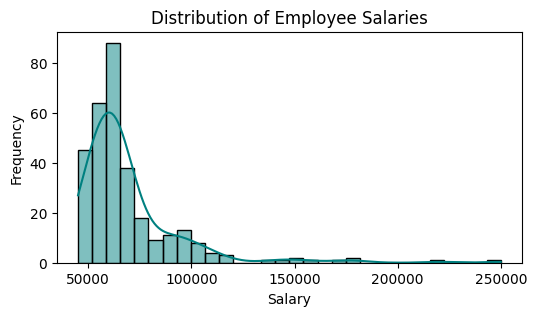

In [9]:
#Find the distribution of employee salaries.
plt.figure(figsize=(6,3))
sns.histplot(hr_data['Salary'], bins=30, kde=True, color='teal')
plt.title('Distribution of Employee Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [10]:
# What is the average age of employees at the company? (Use DOB column).

from datetime import datetime
hr_data['DOB']=pd.to_datetime(hr_data['DOB'])

#today's date
today=pd.to_datetime('today')
hr_data['Age']=(today.year-hr_data['DOB'].dt.year)
average_age=hr_data['Age'].mean()

print(f"Average age of employees is {average_age} years")

Average age of employees is 17.14790996784566 years


C:\Users\mwang\AppData\Local\Temp\ipykernel_23300\3287186190.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hr_data['DOB']=pd.to_datetime(hr_data['DOB'])


In [11]:
#How many employees are still employed vs terminated?
status_counts = hr_data['EmploymentStatus'].value_counts()

print(status_counts)

EmploymentStatus
Active                    207
Voluntarily Terminated     88
Terminated for Cause       16
Name: count, dtype: int64


The department with the most employees is Production        department with 209 employees.


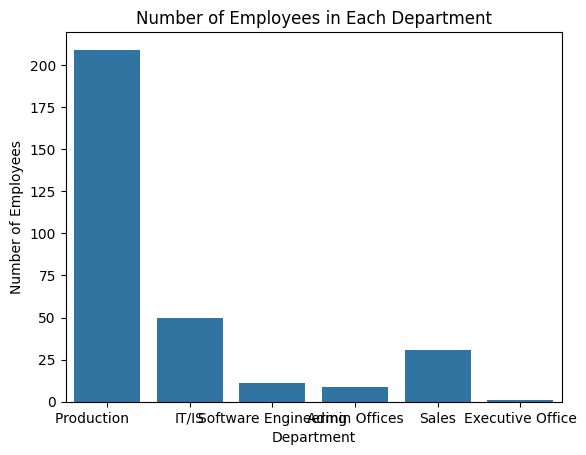

In [12]:
#Which departments have the most employees?
department_counts = hr_data['Department'].value_counts()
top_department = hr_data['Department'].value_counts().idxmax()
emp_count = hr_data['Department'].value_counts().max()

print(f"The department with the most employees is {top_department} department with {emp_count} employees.")

sns.countplot(x='Department', data=hr_data)
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.title('Number of Employees in Each Department')
plt.show()

# Part B: Business Analysis

In [13]:
#What is the average salary per department?
hr_data.groupby('Department')['Salary'].mean().round(2)

Department
Admin Offices            71791.89
Executive Office        250000.00
IT/IS                    97064.64
Production               59953.55
Sales                    69061.26
Software Engineering     94989.45
Name: Salary, dtype: float64

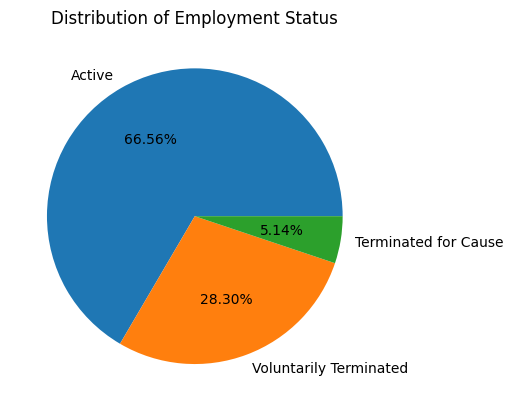

In [14]:
#Find the distribution of employment status (Active, Voluntarily Terminated, etc.).
plt.pie(status_counts.values, labels=status_counts.index, autopct='%0.2f%%')
plt.title('Distribution of Employment Status')
plt.show()

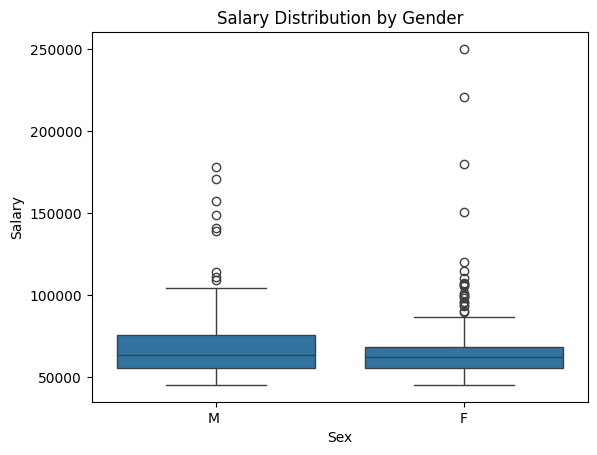

In [15]:
#Compare salary levels between Male and Female employees.
sns.boxplot(x=hr_data['Sex'], y=hr_data['Salary'])
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.title('Salary Distribution by Gender')
plt.show()

In [16]:
#Which recruitment source brings in the most employees?
top_source = hr_data['RecruitmentSource'].value_counts().idxmax()
top_count = hr_data['RecruitmentSource'].value_counts().max()
print(f"The recruitment source that brings in the most employees is '{top_source}' with {top_count} hires.")

hr_data['RecruitmentSource'].value_counts(ascending=False)

The recruitment source that brings in the most employees is 'Indeed' with 87 hires.


RecruitmentSource
Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: count, dtype: int64

In [17]:
# What percentage of employees attended a Diversity Job Fair?
    # Assuming 1 = Yes, 0 = No
attended_count = hr_data['FromDiversityJobFairID'].eq(1).sum()
total_employees = len(hr_data)

attendance_pct = (attended_count / total_employees * 100).round(2)
print(f"{attendance_pct}% of employees were recruited via a Diversity Job Fair.")

9.32% of employees were recruited via a Diversity Job Fair.


In [18]:
#Compare engagement survey scores across different departments
engagement_by_dept = hr_data.groupby('Department')['EngagementSurvey'].mean()
print(engagement_by_dept)

Department
Admin Offices           4.393333
Executive Office        4.830000
IT/IS                   4.154000
Production              4.129569
Sales                   3.818710
Software Engineering    4.061818
Name: EngagementSurvey, dtype: float64


In [19]:
# Which race has the highest average salary?
avg_salary_by_race = hr_data.groupby('RaceDesc')['Salary'].mean().round(2)
top_race = avg_salary_by_race.idxmax()
top_salary = avg_salary_by_race.max()

print(f"The race with the highest average salary is '{top_race}' with an average of ${top_salary}.")
hr_data.groupby('RaceDesc')['Salary'].mean()

The race with the highest average salary is 'Hispanic' with an average of $83667.0.


RaceDesc
American Indian or Alaska Native    65806.000000
Asian                               68521.206897
Black or African American           74431.025000
Hispanic                            83667.000000
Two or more races                   59998.181818
White                               67287.545455
Name: Salary, dtype: float64

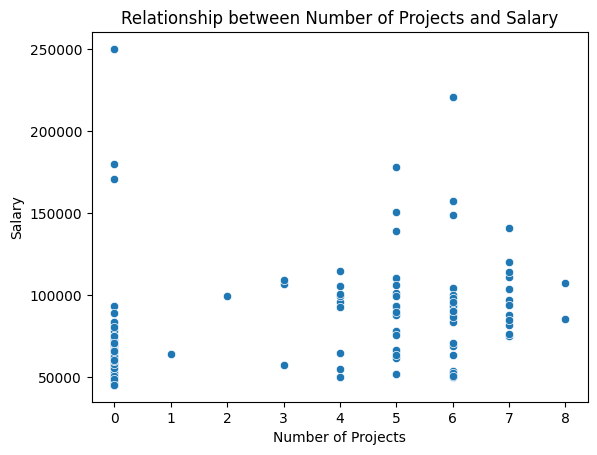

In [20]:
#What is the relationship between number of projects (SpecialProjectsCount) and salary?
sns.scatterplot(x=hr_data['SpecialProjectsCount'], y=hr_data['Salary'])
plt.xlabel('Number of Projects')
plt.ylabel('Salary')
plt.title('Relationship between Number of Projects and Salary')
plt.show()

In [21]:
#Do married employees earn more on average than single employees?
avg_salary_by_marital = hr_data.groupby('MaritalDesc')['Salary'].mean().round(2)
print(avg_salary_by_marital)

# Married employees earn an average of $69827.72, while single employees earn $70052.58.


MaritalDesc
Divorced     64427.33
Married      69827.72
Separated    62934.33
Single       70052.58
Widowed      65195.12
Name: Salary, dtype: float64


In [22]:
#Which managers have the largest teams?
hr_data['ManagerName'].value_counts()

ManagerName
Michael Albert        22
Kissy Sullivan        22
Elijiah Gray          22
Kelley Spirea         22
Brannon Miller        22
David Stanley         21
Webster Butler        21
Ketsia Liebig         21
Amy Dunn              21
Janet King            19
Simon Roup            17
John Smith            14
Peter Monroe          14
Lynn Daneault         13
Alex Sweetwater        9
Brian Champaigne       8
Brandon R. LeBlanc     7
Jennifer Zamora        7
Eric Dougall           4
Debra Houlihan         3
Board of Directors     2
Name: count, dtype: int64

# Part C: Data Visualization

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


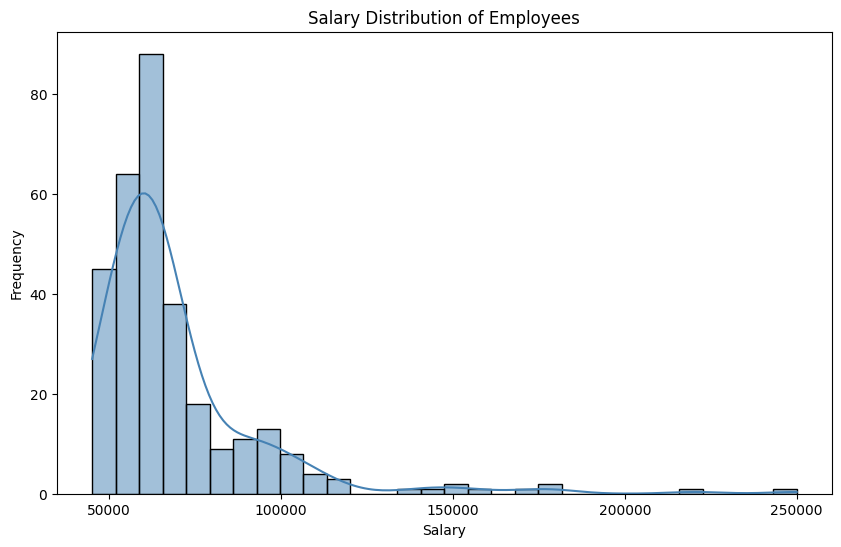

In [24]:
#Plot the salary distribution using histograms.
plt.figure(figsize=(10, 6))
sns.histplot(hr_data['Salary'], bins=30, kde=True, color='steelblue')
plt.title('Salary Distribution of Employees')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

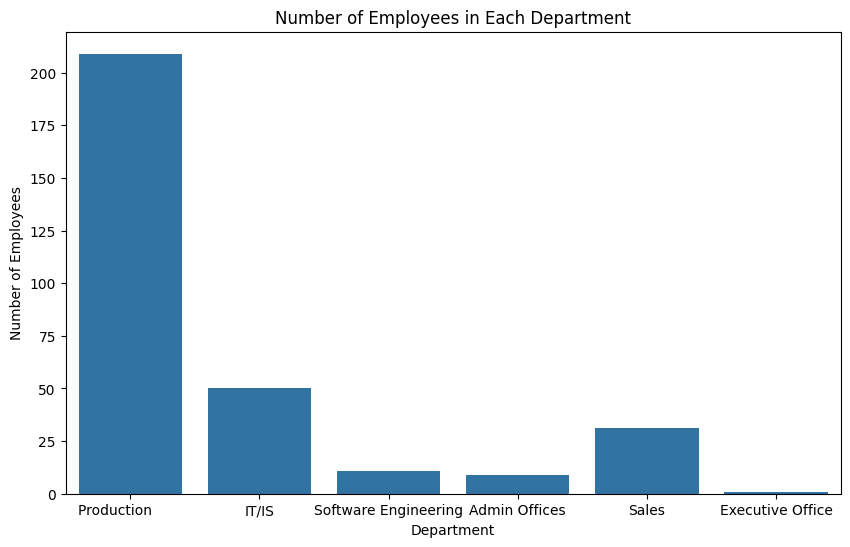

In [25]:
#Show the count of employees by department.
plt.figure(figsize=(10, 6))
sns.countplot(x=hr_data['Department'])
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.title('Number of Employees in Each Department')
plt.show()

C:\Users\mwang\AppData\Local\Temp\ipykernel_23300\3101572562.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hr_data['Department'], y=hr_data['EmpSatisfaction'],palette='viridis')


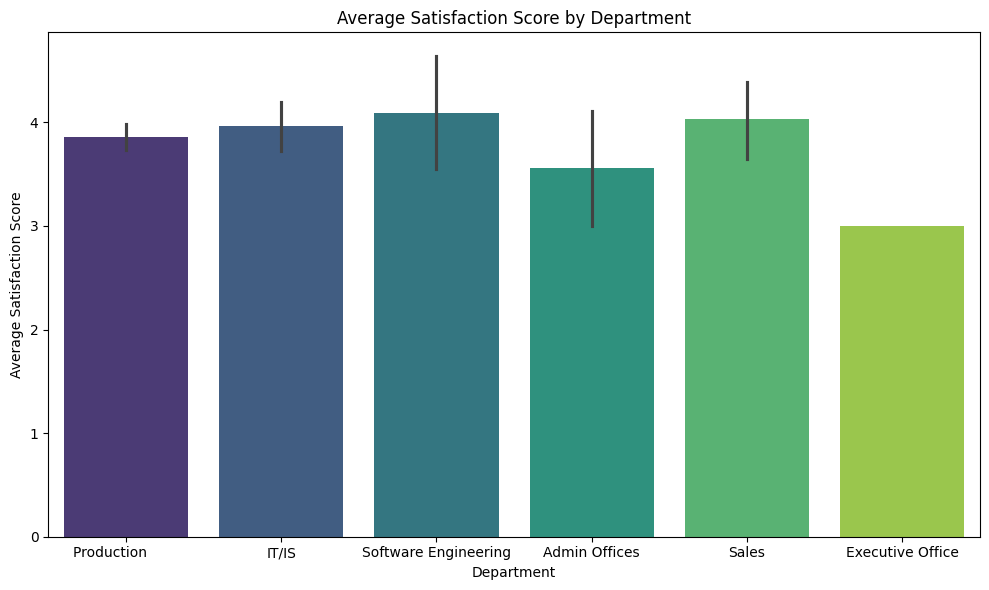

In [26]:
#Compare average satisfaction score by department.
plt.figure(figsize=(10, 6))
sns.barplot(x=hr_data['Department'], y=hr_data['EmpSatisfaction'],palette='viridis')
plt.xlabel('Department')
plt.ylabel('Average Satisfaction Score')
plt.title('Average Satisfaction Score by Department')
plt.tight_layout()
plt.show()

Total employee terminations: 311


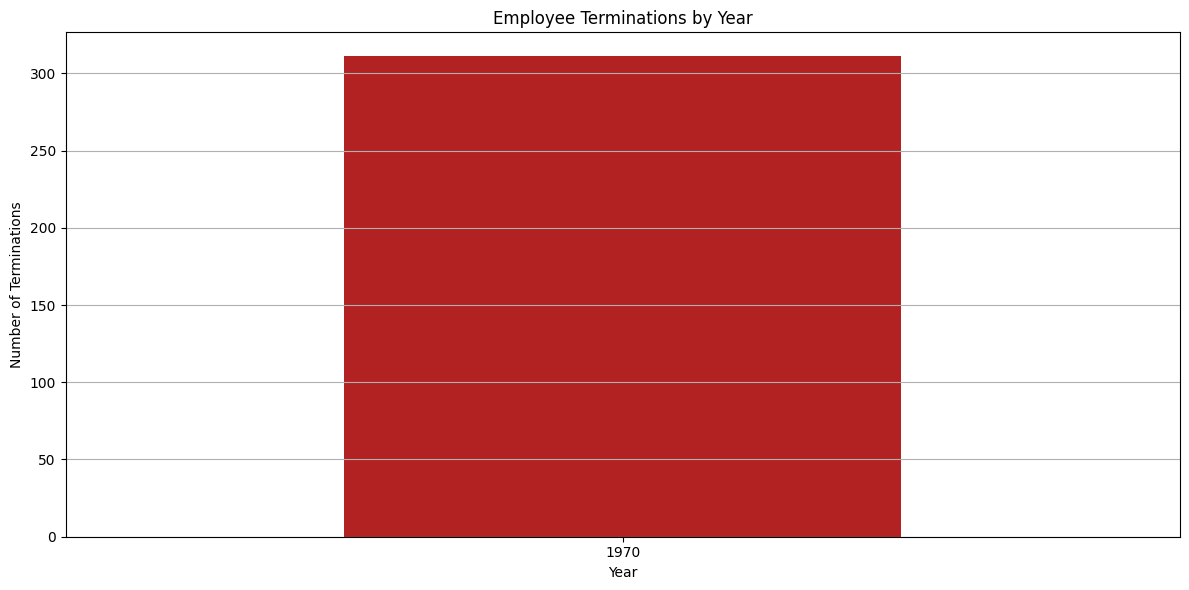

In [62]:
#Visualize employee terminations over time.
total_terminations = hr_data['Termd'].notna().sum()
print(f"Total employee terminations: {total_terminations}")

    # Convert Termd to datetime
hr_data['Termd'] = pd.to_datetime(hr_data['Termd'], errors='coerce')

    # Drop rows with invalid dates
terminated = hr_data.dropna(subset=['Termd']).copy()

    # Extract year and count terminations
terminated['Year'] = terminated['Termd'].dt.year
termination_by_year = terminated['Year'].value_counts().sort_index()

    # Plot
plt.figure(figsize=(12, 6))
termination_by_year.plot(kind='bar', color='firebrick')
plt.title('Employee Terminations by Year')
plt.xlabel('Year')
plt.ylabel('Number of Terminations')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

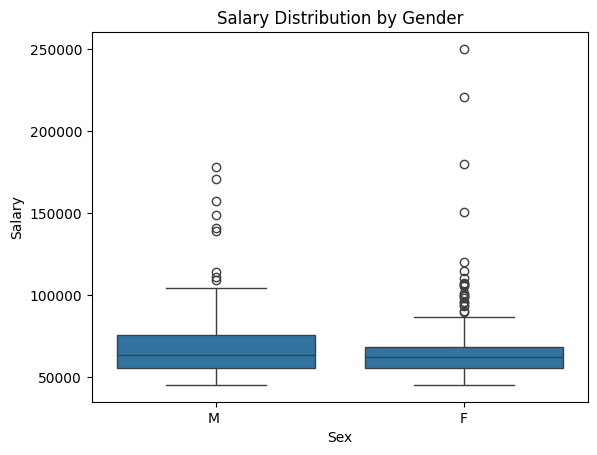

In [29]:
#Plot average salary by gender using a boxplot.
sns.boxplot(x=hr_data['Sex'], y=hr_data['Salary'])
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.title('Salary Distribution by Gender')
plt.show()

C:\Users\mwang\AppData\Local\Temp\ipykernel_23300\4138083436.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=hr_data, x='PerformanceScore', y='Salary', palette='muted')


Text(0.5, 1.0, 'Salary Distribution by Performance Score (Violin Plot)')

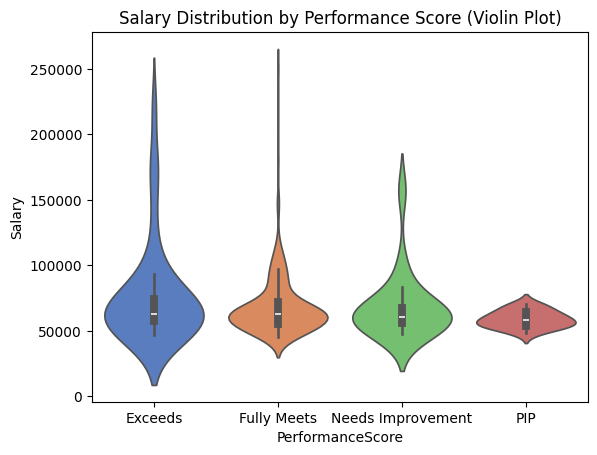

In [30]:
#Visualize performance scores vs salary.
sns.violinplot(data=hr_data, x='PerformanceScore', y='Salary', palette='muted')
plt.title('Salary Distribution by Performance Score (Violin Plot)')

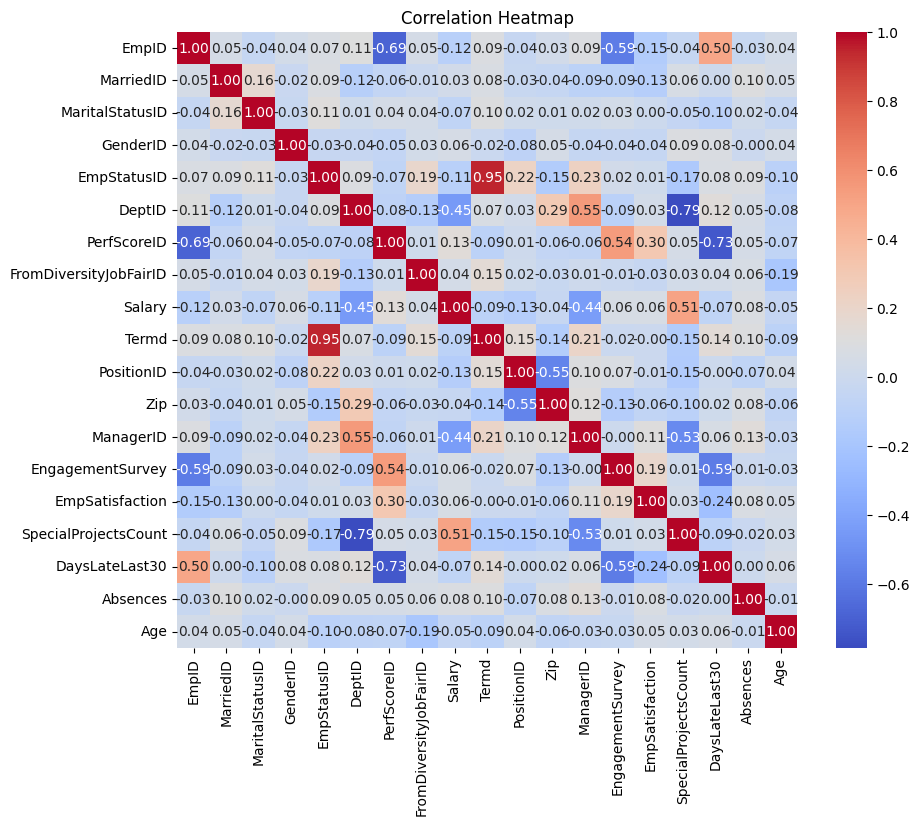

In [31]:
#Create a heatmap of correlations between numeric variables.
numeric_columns = hr_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

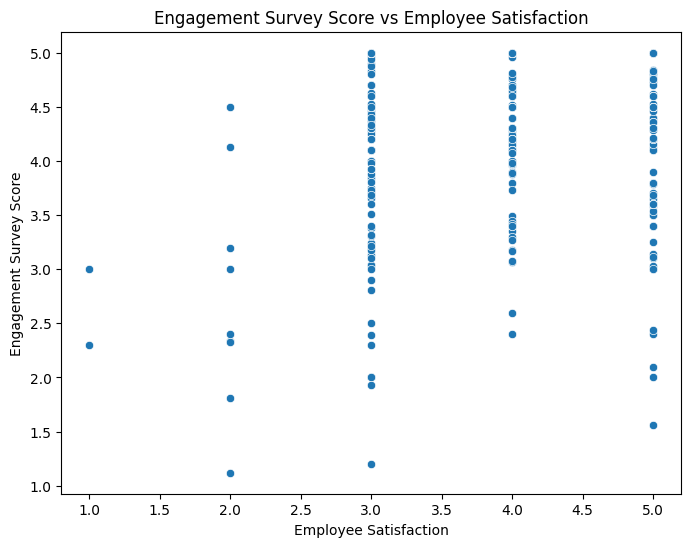

In [32]:
#Plot engagement survey score vs satisfaction score
plt.figure(figsize=(8, 6))
sns.scatterplot(x=hr_data['EmpSatisfaction'], y=hr_data['EngagementSurvey'])
plt.xlabel('Employee Satisfaction')
plt.ylabel('Engagement Survey Score')
plt.title('Engagement Survey Score vs Employee Satisfaction')
plt.show()

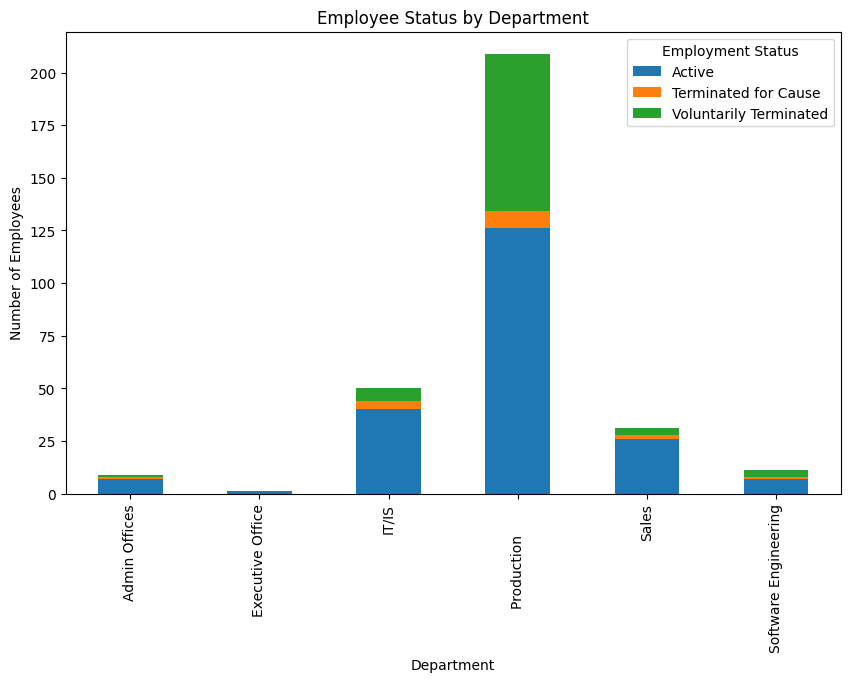

In [33]:
#Show a stacked bar chart of employee status across departments
status_counts = hr_data.groupby(['Department', 'EmploymentStatus']).size().unstack()
status_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.title('Employee Status by Department')
plt.legend(title='Employment Status')
plt.show()

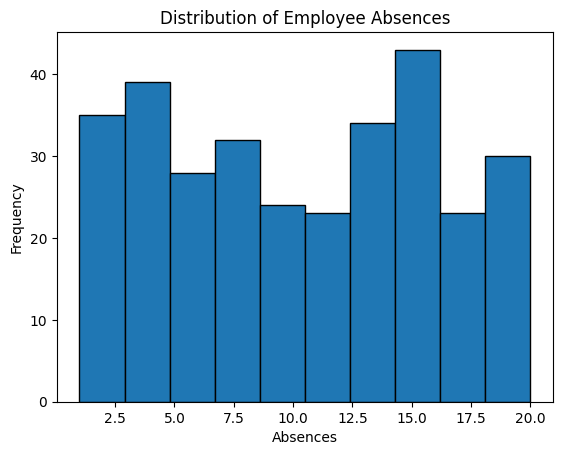

In [34]:
#Plot absenteeism (Absences) distribution among employees.
plt.hist(hr_data['Absences'], bins=10, edgecolor='black')
plt.xlabel('Absences')
plt.ylabel('Frequency')
plt.title('Distribution of Employee Absences')
plt.show()

# Part D: PCA (Dimensionality Reduction)

In [35]:
#Standardize numerical features before applying PCA.
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

    # Select numeric features
numeric_data = hr_data.select_dtypes(include='number')

    # Impute missing values
imputer = SimpleImputer(strategy='mean') 
imputed_data = imputer.fit_transform(numeric_data)

    # Standardize
scaled_data = StandardScaler().fit_transform(imputed_data)


In [36]:
# Perform PCA on the dataset and explain the first 2 components.

# Apply PCA
pca = PCA()
pca_components = pca.fit_transform(scaled_data)

# Get component loadings
loadings = pd.DataFrame(pca.components_[:2], columns=numeric_data.columns, index=['PC1', 'PC2'])
print(loadings.T.sort_values(by='PC1', ascending=False).head(5))  # Top contributors to PC1
print(loadings.T.sort_values(by='PC2', ascending=False).head(5))  # Top contributors to PC2


                           PC1       PC2
PerfScoreID           0.390024 -0.332180
EngagementSurvey      0.325377 -0.329374
SpecialProjectsCount  0.311042  0.362368
Salary                0.277303  0.249611
EmpSatisfaction       0.139495 -0.188339
                           PC1       PC2
SpecialProjectsCount  0.311042  0.362368
DaysLateLast30       -0.374174  0.296968
EmpID                -0.360258  0.288524
Salary                0.277303  0.249611
GenderID             -0.002068  0.106426


- High PC1 scores  indicate high-performing, well-compensated employees with strong engagement
- High PC2 scores may signal long-tenured employees with consistent attendance

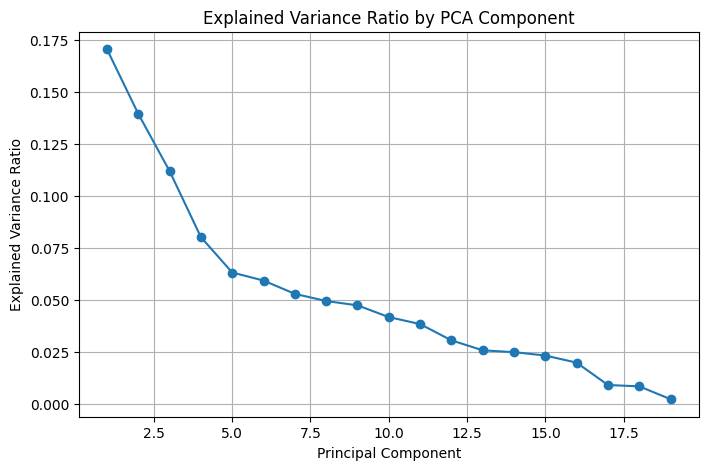

In [37]:
# Plot the explained variance ratio for the PCA components.
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_,
         marker='o')
plt.title('Explained Variance Ratio by PCA Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

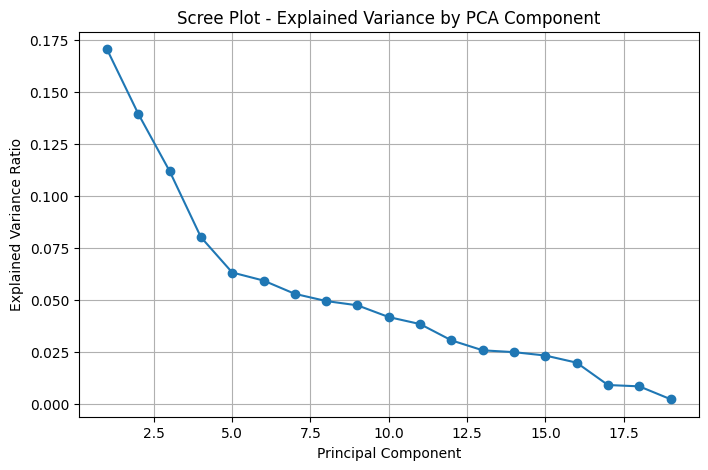

In [38]:
# Plot the explained variance ratio for the PCA components.
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_, marker="o")
plt.title("Scree Plot - Explained Variance by PCA Component")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()



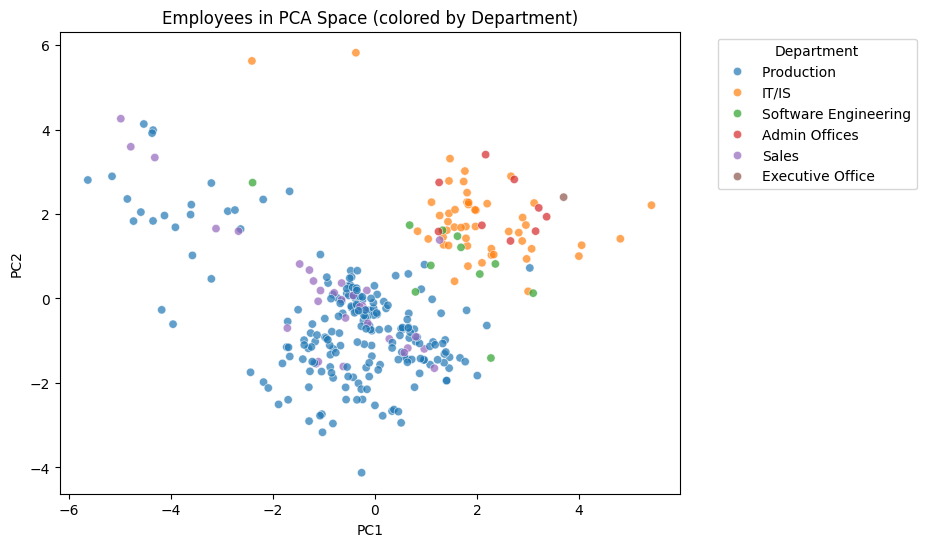

In [39]:
# Reduce the dataset to 2 dimensions with PCA and plot employees colored by department.
pca_2d = PCA(n_components=2)
pca_data = pca_2d.fit_transform(scaled_data)

# Create DataFrame for plotting
pca_hr_data = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_hr_data['Department'] = hr_data['Department']

# Scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_hr_data, x='PC1', y='PC2', hue='Department', alpha=0.7)
plt.title("Employees in PCA Space (colored by Department)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Department')
plt.show()



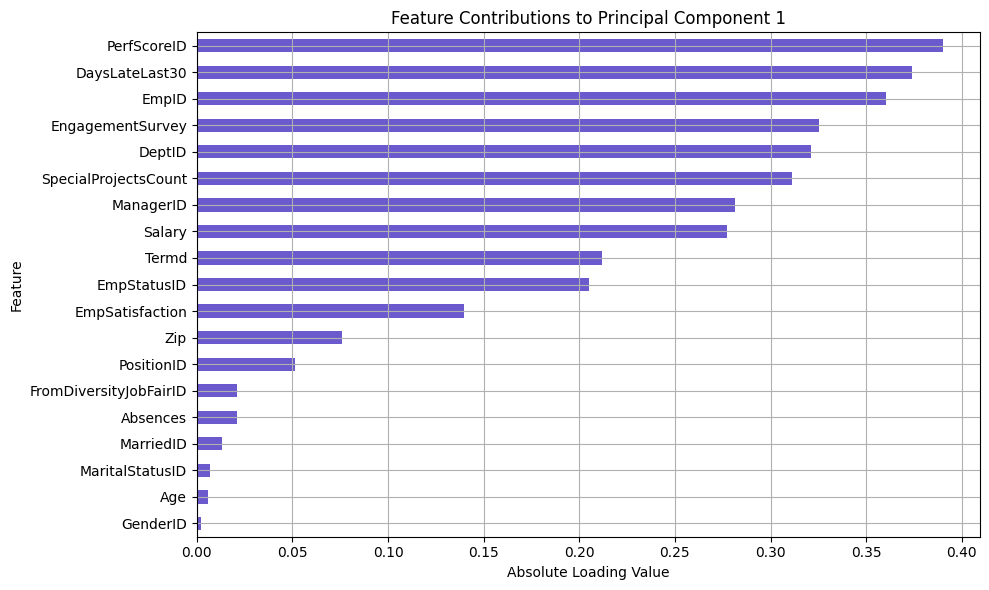

In [40]:
# Which variables contribute most to the first principal component?

    # Get feature names
feature_names = hr_data.select_dtypes(include='number').columns

    # Create a Series of PC1 loadings
pc1_loadings = pd.Series(pca.components_[0], index=feature_names)

    # Sort by absolute contribution
pc1_sorted = pc1_loadings.abs().sort_values(ascending=True)

    # Plot
plt.figure(figsize=(10, 6))
pc1_sorted.plot(kind='barh', color='slateblue')
plt.title('Feature Contributions to Principal Component 1')
plt.xlabel('Absolute Loading Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.grid(True)
plt.show()

- Employees with high PC1 scores are likely:
• 	High performers
• 	Engaged and satisfied
• 	Rarely late

- Those with low PC1 scores might be:
• 	Underperforming
• 	Disengaged
• 	Frequently late

In [41]:
# Apply PCA to engagement + satisfaction + absences. Do these condense into 1 dimension?

# Select the 3 features
subset = hr_data[['EngagementSurvey', 'EmpSatisfaction', 'Absences']]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
subset_imputed = imputer.fit_transform(subset)

# Standardize
scaler = StandardScaler()
subset_scaled = scaler.fit_transform(subset_imputed)

# Apply PCA
pca = PCA()
pca.fit(subset_scaled)

# Explained variance
explained_var = pca.explained_variance_ratio_
print(explained_var)

[0.39958328 0.33535499 0.26506173]


- Interpretation
• 	No single component dominates — PC1 captures ~40%, but PC2 and PC3 are close behind, this means the three features do not condense cleanly into one dimension.

- 	Instead, they form a multi-dimensional behavioral profile:
• 	PC1 might reflect employee sentiment (engagement + satisfaction)
• 	PC2 could represent attendance behavior (absences)
• 	PC3 may capture nuanced interactions or noise

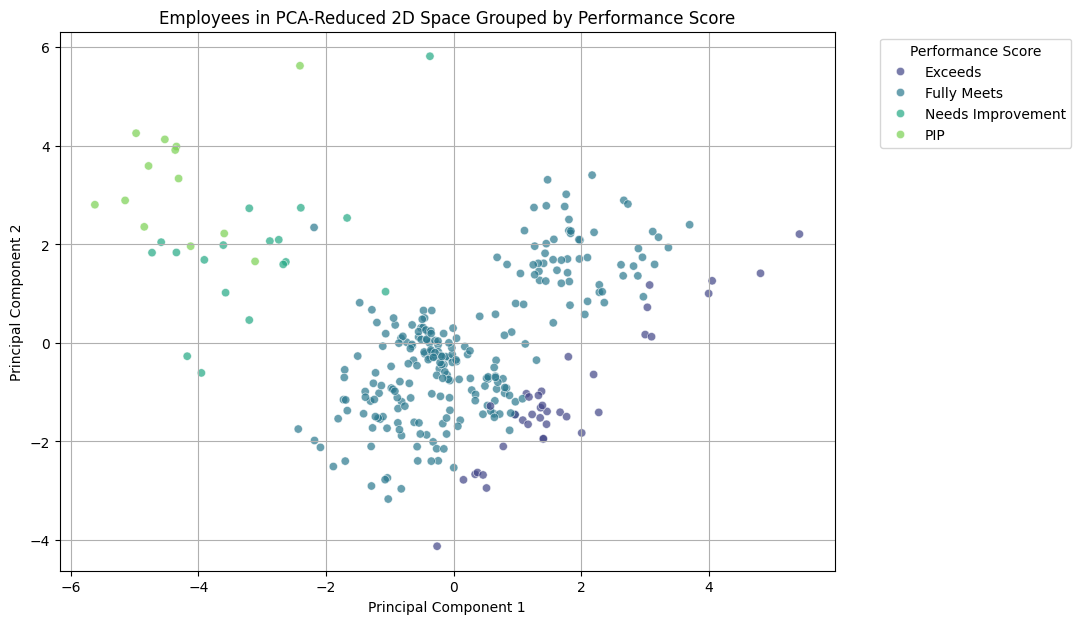

In [42]:
# Visualize employees in PCA-reduced 2D space grouped by PerformanceScore.
    # Reduce to 2 principal components
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(scaled_data)

    # Create a DataFrame for plotting
pca_df = pd.DataFrame(pca_2d, columns=['PC1', 'PC2'])
pca_df['PerformanceScore'] = hr_data['PerformanceScore']

plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='PerformanceScore', palette='viridis', alpha=0.7)
plt.title('Employees in PCA-Reduced 2D Space Grouped by Performance Score')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Performance Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [43]:
# Compare clustering before and after PCA using k-means on numeric data.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Clustering on raw numeric data
kmeans_raw = KMeans(n_clusters=3, random_state=42)
labels_raw = kmeans_raw.fit_predict(scaled_data)
sil_raw = silhouette_score(scaled_data, labels_raw)

# Clustering on PCA-reduced data (2D or top N PCs)
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(pca_data[:, :2])  # first 2 PCs
sil_pca = silhouette_score(pca_data[:, :2], labels_pca)

print("Silhouette Score (Raw):", sil_raw)
print("Silhouette Score (PCA 2D):", sil_pca)

Silhouette Score (Raw): 0.1474399911900165
Silhouette Score (PCA 2D): 0.557787217964807


- Original Data (0.15): Clusters are weakly defined — likely noisy or overlapping due to high dimensionality.
- PCA-Reduced Data (0.56): Clusters are much tighter and better separated — PCA compressed the data into dimensions that capture the most variance.

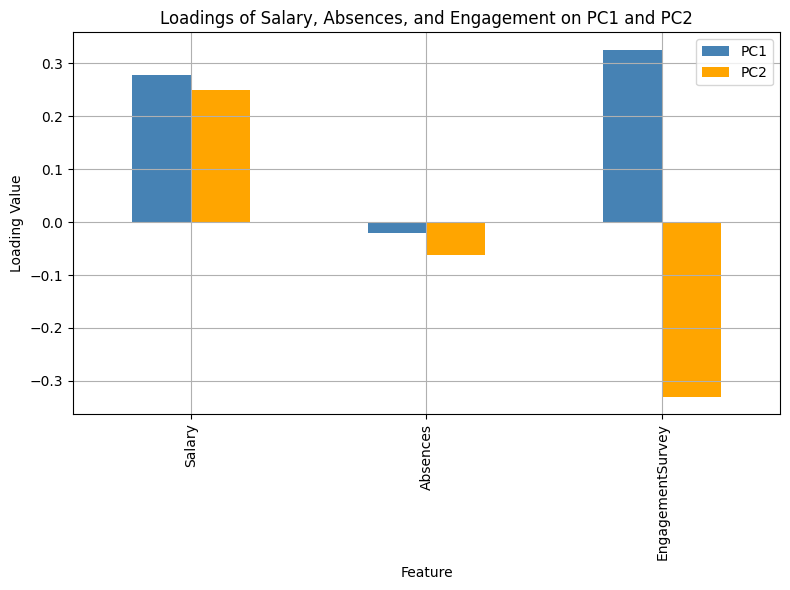

In [44]:
# Plot loadings of salary, absences, and engagement on the first 2 PCs.

    # Select the features of interest
features = ['Salary', 'Absences', 'EngagementSurvey']

    # Extract loadings from PCA
loadings = pd.DataFrame(pca.components_[:2], columns=hr_data.select_dtypes(include='number').columns, index=['PC1', 'PC2'])

    # Filter for selected features
selected_loadings = loadings[features].T

    # Plot
selected_loadings.plot(kind='bar', figsize=(8, 6), color=['steelblue', 'orange'])
plt.title('Loadings of Salary, Absences, and Engagement on PC1 and PC2')
plt.ylabel('Loading Value')
plt.xlabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()

-  PC1(Workforce Value):  Salary and EngagementSurvey both load positively
                       :  This component could be used to rank employees by overall contribution and satisfaction.

-  PC2(Engagement vs Compensation Tension) :  Salary loads positively, while EngagementSurvey loads negatively i.e perhaps identifying employees who are well-paid but disengaged, or highly engaged but underpaid.
                                           :  Useful for spotting morale mismatches or compensation misalignment.






In [45]:
# Discuss when PCA is appropriate in HR analytics (e.g., reducing survey dimensions).


PCA is most useful when you have many correlated numeric variables and want to reduce dimensionality while preserving as much variance (information) as possible.

In HR analytics, PCA makes sense in cases like:

- Employee surveys: Engagement, satisfaction, culture-fit, motivation, etc. are often correlated. PCA can condense them into fewer factors (e.g., “overall engagement”).

- Performance metrics: If employees have multiple scores (productivity, quality, timeliness, collaboration), PCA can reduce them into 1–2 overall performance indices.

- Absenteeism & time-tracking: Days late, absence hours, leave counts might be redundant. PCA can summarize them into a single “attendance” dimension.

- Skill assessments: Multiple test scores may be compressed into fewer latent skill dimensions.

When not appropriate:

- If variables are categorical (e.g., department, job role). PCA assumes continuous numeric data.

- If interpretability is more important than dimensionality reduction. (HR managers often prefer simple, clear metrics over abstract PCs.)

- If features are already uncorrelated (then PCA doesn’t add value)